# Numeričke karakteriskie slučajnih promenljivih


### Karakteristike slučajne promenljive mogu se odrediti matematički ako se zna raspodela, ili oceniti statistički, empirijski (ako se ne zna raspodela).


### Ako je poznata raspodela, karakteristike SP se određuju iz formula.

## Matematičko očekivanje
U Pythonu racunamo matematičko očekivanje diskretne slučajne promenljive pomoću formule $E[X] = \sum_x P(X=x)x$.

Za neprekidne slučajne promenljive moramo da aproksimativno racunamo integral: $E[X] = \int_{-\infty}^{\infty} xp(x)dx$, gde je $p(x)$ funkcija gustine raspodele.

In [73]:
import numpy as np

PP=np.array([[5.,2,4],[1,10,0.5]])  # Menjanjem ovoga menjamo (ne)zavisnost slucajnih promenljivih
P=PP/np.sum(PP) 
# Vrednosti koje uzimaju slucajne promenljive:
x=np.array([1,2,6])
y=np.array([-1,1])
# Racunanje marginalne raspodele (raspodele samo jedne odvojene slucajne promenljive
Px=P.sum(axis=0)
Py=P.sum(axis=1)
Px,Py

(array([0.26666667, 0.53333333, 0.2       ]), array([0.48888889, 0.51111111]))

In [74]:
#Racunanje srednje vrednosti
#Bez numpy funkcija
Ex = 0
for i in range(3):
    Ex+=Px[i]*x[i]
Ey = 0
for i in range(2):
    Ey+=Py[i]*y[i]

Ex,Ey

(2.533333333333333, 0.022222222222222143)

In [75]:
N=10000
uzorci_x=np.random.choice(x,size=N, replace=True, p=Px)
#print(uzorci_x)
uzorci_x.mean()

2.5509

In [76]:
# U numpy-u np.dot(A,B) racuna sumu proizvoda parova elemenata iz A i B
Ex=np.dot(Px,x)
Ey=np.dot(Py,y)
Ex,Ey

(2.533333333333333, 0.022222222222222143)

## Varijansa
Formula za diskretne SP: ${\text Var}[X] = \sum_x P(X=x)(x-E[x])^2$. 

Za neprekidne se racuna integral: ${\text Var}[X] = \int_{-\infty}^{\infty} (x-E(x))^2 p(x)dx$

In [77]:
from math import sqrt
varx = 0
for i in range(3):
    varx+=Px[i]*(x[i] - Ex)**2
stdx = sqrt(varx)

vary = 0
for i in range(2):
    vary+=Py[i]*(y[i] - Ey)**2
stdy = sqrt(vary)

stdx,stdy

(1.7838784213679537, 0.9997530559290659)

In [78]:
# pomocu numpy .dot
Ex2=np.dot(Px,x**2)
Ey2=np.dot(Py,y**2)
stdx=sqrt(Ex2-Ex**2)
stdy=sqrt(Ey2-Ey**2)
stdx,stdy

(1.7838784213679537, 0.999753055929066)

In [79]:
N=1000
uzorci_x=np.random.choice(x,size=N, replace=True, p=Px)
#print(uzorci_x)
uzorci_x.std()

1.8179933993279516

## Kovarijansa
Formula za diskretne SP: ${\text Covar}[X,Y] = \sum_{x,y} P(X=x,Y=y)(x-E[x])(y-E(y))$. 

Za neprekidne se racuna integral: ${\text Covar}[X,Y] = \int_{-\infty}^{\infty} (x-E(x))(y-E[y]) p(x,y)dxdy$

In [80]:
# Kovarjansa
nx=x-Ex
ny=y-Ey
s=0
for i in range(len(x)):
    for j in range(len(y)):
        s+=P[j,i]*nx[i]*ny[j]
nx, ny, s

(array([-1.53333333, -0.53333333,  3.46666667]),
 array([-1.02222222,  0.97777778]),
 -0.45629629629629626)

In [81]:
# numpy

print('Kovarijansa je', np.dot(P.flatten(), np.outer(ny,nx).flatten()))

Kovarijansa je -0.4562962962962963


## Korelacija

In [82]:
s/(stdx*stdy),stdx,stdy

(-0.2558520795625243, 1.7838784213679537, 0.999753055929066)

### Funkcija koja racuna sve zajedno

In [9]:
import numpy as np
from math import sqrt

def Num_karakteristike(P,x,y):
    P/=np.sum(P) # normalizovanje u slucaju da raspodela nije normalizovana
    Px=np.sum(P,axis=0) # marginalne raspodele
    Py=np.sum(P,axis=1)
    Ex=np.dot(Px,x)
    Ey=np.dot(Py,y)
    
    Ex2=np.dot(Px,x**2)
    Ey2=np.dot(Py,y**2)
    
    stdx=sqrt(Ex2-Ex**2)
    stdy=sqrt(Ey2-Ey**2)
    
    nx=x-Ex
    ny=y-Ey
    
    cov=np.dot(P.flatten(), np.outer(ny,nx).flatten())
    corr=cov/(stdx*stdy)
    return {
        'P':P,
        'x':x,
        'y':y,
        'Px':Px,
        'Py':Py,
        'Ex':Ex,
        'Ey':Ey,
        'stdx':stdx,
        'stdy':stdy,
        'cov':cov,
        'corr':corr
    }


In [10]:
x=np.arange(1.,2.,0.2)
y=np.arange(0.,1.,0.2)
P=np.eye(5)
print(x,y)
P
A=Num_karakteristike(P,x,y)
print(A['cov'],A['corr'])

[ 1.   1.2  1.4  1.6  1.8] [ 0.   0.2  0.4  0.6  0.8]
0.08 1.0


### Matematičko očekivanje binomne raspodele

In [87]:
from scipy import stats
n=20
p=0.1
k = np.arange(0, n+1)
P_binom = stats.binom.pmf(k, n, p)

E_binom=np.dot(P_binom,k)
E_binom, n*p

(1.9999999999999978, 2.0)

### Varijansa Binomne raspodele

In [92]:
E2=np.dot(P_binom,k**2)
std_binom=sqrt(E2-E_binom**2)
std_binom, sqrt(n*p*(1-p))

(1.341640786499874, 1.3416407864998738)

### Matematičko očekivanje normalne raspodele

In [97]:
korak=0.01
x = np.arange(-100, 100,korak)
m=30
var=10
sig=var**0.5
P_norm = stats.norm.pdf(x, m, sig)

E_norm=np.sum(np.array([korak*z*x for x,z in zip(x,P_norm)]))
print(E_norm)
E_norm=np.dot(P_norm,x)*korak

29.999999999984652


### Varijansa normalne raspodele

In [103]:
korak=0.01
x = np.arange(-100, 100,korak)
m=5
var=30
sig=var**0.5
P_norm = stats.norm.pdf(x, m, sig)
E_norm=np.dot(P_norm,x)*korak

Var_norm=np.sum(np.array([korak*z*(x-E_norm)**2 for x,z in zip(x,P_norm)]))
Var_norm

29.999999999984656

## Medijana

In [15]:
PP=np.array([[2.,2,4],[1,1,2]]) 
P=PP/np.sum(PP) 

x=np.array([1,2,6])
Px=P.sum(axis=0)
med_index=[i for i in np.arange(0,len(Px)) if (np.sum(Px[:i+1]) >= 0.5) and  (np.sum(Px[i:]) >= 0.5)]

med=np.mean(x[med_index])
med

4.0

### Medijana normalne raspodele

In [16]:
korak=0.1
x = np.arange(-100, 100,korak)
m=5
var=10
sig=var**0.5
P_norm = stats.norm.pdf(x, m, sig)

med_index_norm=[i for i in np.arange(0,len(P_norm)) if (korak*np.sum(P_norm[:i+1]) >= 0.5) and (korak*np.sum(P_norm[i:]) >= 0.5)]

med_norm=np.mean(x[med_index_norm])
med_norm

4.9999999999940314

### Medijana i srednja vrednost eksponencijalne raspodele

In [17]:
lam=2
korak=0.01
x = np.arange(0, 10, korak)
P_exp=stats.expon.pdf(x, scale=1/lam)

E_exp=np.sum(np.array([korak*z*x for x,z in zip(x,P_exp)]))

med_index_exp=[i for i in np.arange(0,len(P_exp)) if (korak*np.sum(P_exp[:i+1]) >= 0.5) and (korak*np.sum(P_exp[i:]) >= 0.5)]

med_exp=np.mean(x[med_index_exp])
E_exp, med_exp

(0.49998331181778027, 0.34500000000000003)

## Kvantili

In [18]:
# Kvantili (Percentili) - inverzna vrednost kumulativne funckije raspodele

p1=stats.norm.ppf(0.01, loc=0, scale=1)
p2=stats.norm.ppf(0.99, loc=0, scale=1)
p1,p2

(-2.3263478740408408, 2.3263478740408408)

In [19]:
# Medijana je kvantil reda 0.5 (0.5-kvantil, 0.5-percentile)
p50=stats.expon.ppf(0.5, scale=1/lam)
p50

0.34657359027997264

##  Ako nije poznata raspodela, vrši se statistička estimacija (slično kao što smo određivali empirijsku verovatnoću - što više nezavisnih uzoraka imamo to je bolja estimacija)

### Karakterizacija centra raspodele

In [20]:
# numpy srednja vrednost - estimacija matematickog ocekivanja
import numpy as np
x = np.arange(10)
x,np.mean(x)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 4.5)

In [21]:
# medijana - estimacija se odredjuje kao tacka koja deli podatke na histogramu u dva dela sa jednakim brojem tacaka
np.median(x)

4.5

In [22]:
# Medijana je robusnija na nesimetricne "outlier"-e
x =np.append(x,100)
np.mean(x),np.median(x)

(13.181818181818182, 5.0)

In [23]:
# Mod - najverovatnija vrednost (kod neprekidnih SP ovo je tacka u cijoj okolini je najverovatnije da ce se naci uzorci)
# Ova funkcija ga estimira kao vrednost koja se najcesce pojavljuje
x =np.append(x,7)
stats.mode(x)

ModeResult(mode=array([7]), count=array([2]))

### Karakterizacija varijabilnosti oko centra

In [24]:
# peak-to-peak : empirijski raspon
raspon = np.ptp(x)
raspon

100

#### Ocena varijanse
Dve standardne formule za statističku ocenu varijanse:

$Var_1=\frac{\sum_{i=i}^N (x_i - \bar{x})^2}{n}$

$Var_2=\frac{\sum_{i=i}^N (x_i - \bar{x})^2}{n-1}$

Prva je ocena maksimalne verodostojnosti, ali nije centrirana (srednja ocena iz više uzoraka nije jednaka pravoj varijansi), druga je centrirana i češće se upotrebljava.

In [25]:
data = np.arange(7,14)
np.std(data, ddof=0)  # sa ddof (delta degrees of freedom) se specificira koja ocena se racuna - ddof=0 racuna Var1

2.0

In [26]:
np.std(data, ddof=1)  #ddof=1 racuna Var2

2.1602468994692869

In [27]:
# Ocena varijanse normalne raspodele
# generisanje uzoraka:
import numpy as np
from scipy import stats
uzorci=stats.norm.rvs(size=1000, loc=0, scale=1)
np.std(uzorci, ddof=0),np.std(uzorci, ddof=1)

(1.02020981853215, 1.0207203063391928)

In [28]:
# Za mali broj uzoraka ocena je losija, ddof=0 daje manju ocenu
uzorci=stats.norm.rvs(size=4, loc=0, scale=1)
np.std(uzorci, ddof=0),np.std(uzorci, ddof=1)

(0.77842682744905045, 0.8988498767442713)

### Poređenje empirijski estimiranih karakteristika sa odgovarajućim stvarnim karakteristikama


In [29]:
P=np.array([[1.,1,1],[1,1,2],[2,1,1]])
x=np.array([-1,0,1]) 
y=np.array([-1,0,1])
A=Num_karakteristike(P,x,y)
Px=A['Px']
Px,A['Ex'],A['cov']

(array([ 0.36363636,  0.27272727,  0.36363636]), 0.0, -0.090909090909090912)

In [30]:
# generisanje uzoraka iz diskretne raspodele:
np.random.choice(x,size=100,replace=True, p=Px)

array([ 1, -1,  1, -1,  0,  1, -1,  1, -1,  0, -1,  1, -1,  1,  1,  1,  1,
        1, -1,  0, -1, -1,  1,  0, -1, -1,  1,  1, -1,  0,  1, -1,  1,  1,
        0,  0,  1, -1,  1,  1,  1, -1,  0, -1,  1,  0,  1,  1,  0, -1,  1,
        1, -1,  1,  0, -1, -1, -1,  1,  1,  1,  1,  1, -1,  0,  1,  0, -1,
       -1, -1,  1,  0,  1, -1,  1,  0,  0, -1,  1,  0,  0,  0, -1,  0,  0,
        1,  1,  1,  1, -1,  0,  1,  0,  0,  1,  1,  1, -1, -1, -1])

In [31]:
# Srednja vrednost
br_uzoraka = [2,10,100,100000]

for br in br_uzoraka: 
    print("Empirijsko očekivanje za {br} uzoraka = {s}".format(
        br = br,
        s = np.mean(np.random.choice(x, br, True, Px))
    ))

Empirijsko očekivanje za 2 uzoraka = -0.5
Empirijsko očekivanje za 10 uzoraka = 0.1
Empirijsko očekivanje za 100 uzoraka = -0.04
Empirijsko očekivanje za 100000 uzoraka = -0.0028


In [32]:
# Kovarijansa - generisemo parove (x,y) iz zdruzene raspodele
xy =  np.array([(i,j) for i in x for j in y])
I=np.random.choice(xy.shape[0], 10, True, P.flatten()) # Biramo slucajno 10 (indeksa) uzoraka iz zdruzene raspodele
xy[I]

array([[-1,  1],
       [ 0,  1],
       [ 1,  1],
       [ 0,  0],
       [ 1, -1],
       [ 0, -1],
       [-1,  0],
       [-1, -1],
       [ 1,  0],
       [-1, -1]])

In [33]:
for br in br_uzoraka:
    I = np.random.choice(xy.shape[0], br, True, P.flatten())
    print("Empirijska kovarijansa za {br} uzoraka = {s}".format(
        br = br,
        s = np.cov(xy[I][:,0], xy[I][:,1],ddof=1)[1,0]  # vraca matricu kovarijanse - uzimamo dijagonalni element [0,1]
    ))
A['stdx']**2

Empirijska kovarijansa za 2 uzoraka = 0.0
Empirijska kovarijansa za 10 uzoraka = 0.08888888888888889
Empirijska kovarijansa za 100 uzoraka = -0.003030303030303085
Empirijska kovarijansa za 100000 uzoraka = -0.09176189391893921


0.7272727272727273

# Računanje očekivanja na podacima
Ponovićemo ilustraciju formule totalne verovatnoće na skupu podataka [student alcohol consumption](https://www.kaggle.com/uciml/student-alcohol-consumption/home).

In [34]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-talk')
atributi = ['G3','school']
data_por = pd.read_csv("student-por.csv",usecols=atributi)
data_por.head()

school  G3
0     GP  11
1     GP  11
2     GP  12
3     GP  14
4     GP  13

Hoćemo da pronađemo raspodelu finalnih ocena po svakoj školi: $P(g|s)$ $\forall g\in\{0,1,\ldots,20\}\ s\in\{\text{'GP'},\text{'MS'}\}$.
Koristićemo sledeću statističku aproksimaciju: $$P(g|s)=\frac{\text{Broj učenika sa ocenom g u školi s}}{\text{Ukupan broj učenika u školi s}}$$

<b>Estimacija $\mathbf{P(g|s)}$</b>

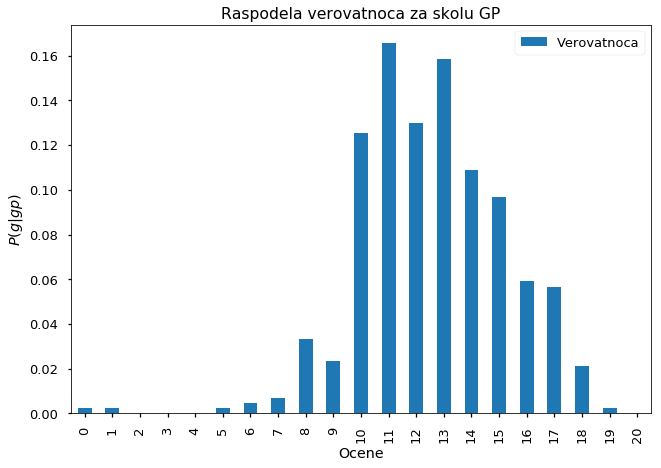

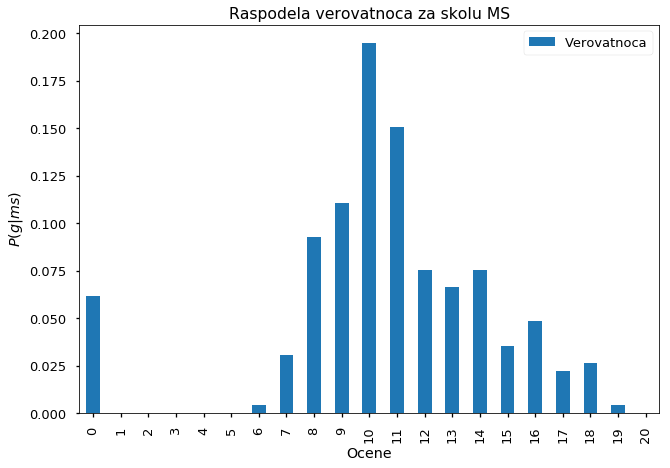

In [35]:
# Za skolu GP
P_G3_given_S_GP = pd.DataFrame(index=range(21))   # 21 moguca ocena
data_temp = data_por.loc[data_por["school"]=="GP","G3"].value_counts()
P_G3_given_S_GP["Verovatnoca"] = (data_temp/data_temp.sum())
P_G3_given_S_GP = P_G3_given_S_GP.fillna(0)

P_G3_given_S_GP.plot.bar()
plt.xlabel("Ocene")
plt.ylabel("$P(g|gp)$")
plt.title("Raspodela verovatnoca za skolu GP")
plt.show()

# Za sklolu MS
P_G3_given_S_MS = pd.DataFrame(index=range(21))
data_temp = data_por.loc[data_por["school"]=="MS","G3"].value_counts()
P_G3_given_S_MS["Verovatnoca"] = data_temp/data_temp.sum()
P_G3_given_S_MS=P_G3_given_S_MS.fillna(0)

P_G3_given_S_MS.plot.bar()
plt.xlabel("Ocene")
plt.ylabel("$P(g|ms)$")
plt.title("Raspodela verovatnoca za skolu MS")
plt.show()

Sada koristimo formulu totalne verovatnoće da izračunamo 

$$P(g) = P(g,gp)+P(g,ms) = P(gp)P(g|gp)+P(ms)P(g|ms)$$.

Dakle, prvo treba da izračunamo $P(s)$ da slučajno izabrani učenik pripada školi $s$.

<b>Estimiranje $\mathbf{P(s)}$</b> 

In [36]:
data_temp = data_por["school"].value_counts()
P_S = pd.DataFrame(data_temp/data_temp.sum())
P_S.columns=["Verovatnoca"]
P_S.columns.name = "Skola"
P_S.plot.bar()
plt.show()

<b>Izračunavanje $\mathbf{P(g)}$</b>

In [37]:
P_G3 = P_G3_given_S_GP*P_S.loc["GP"].values+P_G3_given_S_MS*P_S.loc["MS"].values

P_G3.plot.bar()
plt.xlabel("Ocene")
plt.ylabel("$P(g)$")
plt.title("Raspodela ocene u obe škole")
plt.show()

### Matematičko očekivanje 
Očekivane ocene možemo pronaći pomoću sledećih jednačina:
$$E[G\ |\ S=s] = \sum_{g=0}^{20}gP(g|s) \ \ s\in\{\text{GP},\text{MS}\}$$
$$E[G] = \sum_{g=0}^{20}gP(g)$$

$\mathbf{E[G\ |\ S=\text{GP}]}$:

In [38]:
E_G3_given_S_GP = np.sum([ocena*verovatnoca for ocena,verovatnoca in zip(P_G3_given_S_GP.index,P_G3_given_S_GP.values)])
print("E[G|S = GP]= {:.3f}".format(E_G3_given_S_GP))

E[G|S = GP]= 12.577


$\mathbf{E[G\ |\ S=\text{MS}]}$:

In [39]:
E_G3_given_S_MP = np.sum([ocena*verovatnoca for ocena,verovatnoca in zip(P_G3_given_S_MS.index,P_G3_given_S_MS.values)])
print("E[G|S=MS] {:.3f}".format(E_G3_given_S_MP))

E[G|S=MS] 10.650


$\mathbf{E[G]}$ :

In [40]:
#E_G3 = np.sum([ocena*verovatnoca for ocena,verovatnoca in zip(P_G3.index,P_G3.values)])
#print("E[G] = {:.3f}".format(E_G3))
# ili 

E_G3=np.dot(P_G3.index,P_G3.values)
print(E_G3)


[ 11.90600924]


# Estimacija ostalih karakteristika na podacima

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-talk')
atributi = ['G3','Dalc']
data_por = pd.read_csv("student-por.csv",usecols=atributi)
data_por.head()


Dalc  G3
0     1  11
1     1  11
2     2  12
3     1  14
4     1  13

In [42]:
# statisticka estimacija medijane konzumacije alkohola
med_alk=data_por['Dalc'].median()
med_alk

1.0

In [43]:
# ariitmeticka sredina konzumacije alkohola
sr_vr_alk=data_por['Dalc'].mean()
sr_vr_alk

1.50231124807396

In [44]:
# estimacija standardne devijacije
std_alk=data_por['G3'].std()
std_alk

3.2306562428048045

In [45]:
# moze i na svim kolonama odjednom:
std_alk=data_por.std()
std_alk

Dalc    0.924834
G3      3.230656
dtype: float64

In [46]:
# estimacija kvantila:

data_por.quantile(0.1)  # u zagradi je red kvanitla: 0.5 je medijana, 0.25 je prvi kvartil itd.

Dalc    1.0
G3      8.8
Name: 0.1, dtype: float64

In [47]:
# moze sve u jednoj komandi (za svaku kolonu izbaci karakteristike):
data_por.describe()

Dalc          G3
count  649.000000  649.000000
mean     1.502311   11.906009
std      0.924834    3.230656
min      1.000000    0.000000
25%      1.000000   10.000000
50%      1.000000   12.000000
75%      2.000000   14.000000
max      5.000000   19.000000

In [48]:
# estimacija matrice kovarijanse:
data_por.cov()

Dalc         G3
Dalc  0.855319  -0.611665
G3   -0.611665  10.437140

In [49]:
# koeficijent korelacije:

koef_korelacije=data_por.cov()['Dalc']['G3']/(data_por.cov()['Dalc']['Dalc']*data_por.cov()['G3']['G3'])**0.5
koef_korelacije   # negativan znaci da u proseku kako raste jedna velicina, druga opada 

-0.20471939724815683